 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Set the file path
whale_file_path = Path("Resources/whale_returns.csv")
# Create a Pandas dataframe from a csv file
whale_df = pd.read_csv(whale_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
# Verify null values have been dropped
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# Set the file path
algo_file_path = Path("Resources/algo_returns.csv")
# Create a Pandas dataframe from a csv file
algo_df = pd.read_csv(algo_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
# Verify null values have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
# Set the file path
sp_file_path = Path("Resources/sp500_history.csv")
# Create a Pandas dataframe from a csv file
sp_df = pd.read_csv(sp_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_df.sort_index(inplace=True)
sp_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# Replace '$' with no value
sp_df['Close'] = sp_df['Close'].str.replace('$', '')
# Set Close column values to be float
sp_df['Close'] = sp_df['Close'].astype('float')
# Verify changes
print(sp_df.dtypes, sp_df['Close'])

Close    float64
dtype: object Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64


In [11]:
# Calculate Daily Returns
sp_df['Daily_Return'] = sp_df.pct_change()
sp_df.head()

,Close,Daily_Return
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [12]:
# Drop nulls
# Replace null values with zero. Verify no null values in 'daily_return'
sp_df['Daily_Return'] = sp_df['Daily_Return'].fillna(0)
#Verify no null records in data set
sp_df.isnull().sum()

Close           0
Daily_Return    0
dtype: int64

In [13]:
sp_df.to_csv('Resources/sp500_history_modified.csv')

In [14]:
# Rename `Close` Column to be specific to this portfolio.
# Extract data to new csv file and assign new csv_reader function.
sp_df.to_csv('Resources/sp500_history_modified.csv')
modified_sp_file_path = Path("Resources/sp500_history_modified.csv")
new_sp_df = pd.read_csv(modified_sp_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
col_names = ["SP500_Close", "SP500_Daily_return"]
new_sp_df.columns = col_names
new_sp_df.head()


,SP500_Close,SP500_Daily_return
Date,,
2012-10-01,1444.49,0.000000
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
total_portfolios = pd.concat([new_sp_df,algo_df,whale_df], axis='columns', join='inner')
# Create new columns for sum of each portfolio
total_portfolios['Total_algo'] = total_portfolios['Algo 1'] + total_portfolios['Algo 2']
total_portfolios['Total_whale'] = total_portfolios['SOROS FUND MANAGEMENT LLC'] + total_portfolios['PAULSON & CO.INC. '] + total_portfolios['TIGER GLOBAL MANAGEMENT LLC'] + total_portfolios['BERKSHIRE HATHAWAY INC']
# Drop non-utilized columns
total_portfolios.drop(columns=['SP500_Close', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'], inplace=True)
total_portfolios.sort_index(inplace=True)
total_portfolios.head(5)

,SP500_Daily_return,Total_algo,Total_whale
Date,,,
2015-03-03,-0.004539,-0.002892,-0.013310
2015-03-04,-0.004389,-0.006173,0.007150
2015-03-05,0.001196,0.003368,0.017173
2015-03-06,-0.014174,-0.016417,-0.033059
2015-03-09,0.003944,-0.004144,0.008998


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Total Daily Returns of all Portfolios'}, xlabel='Date'>

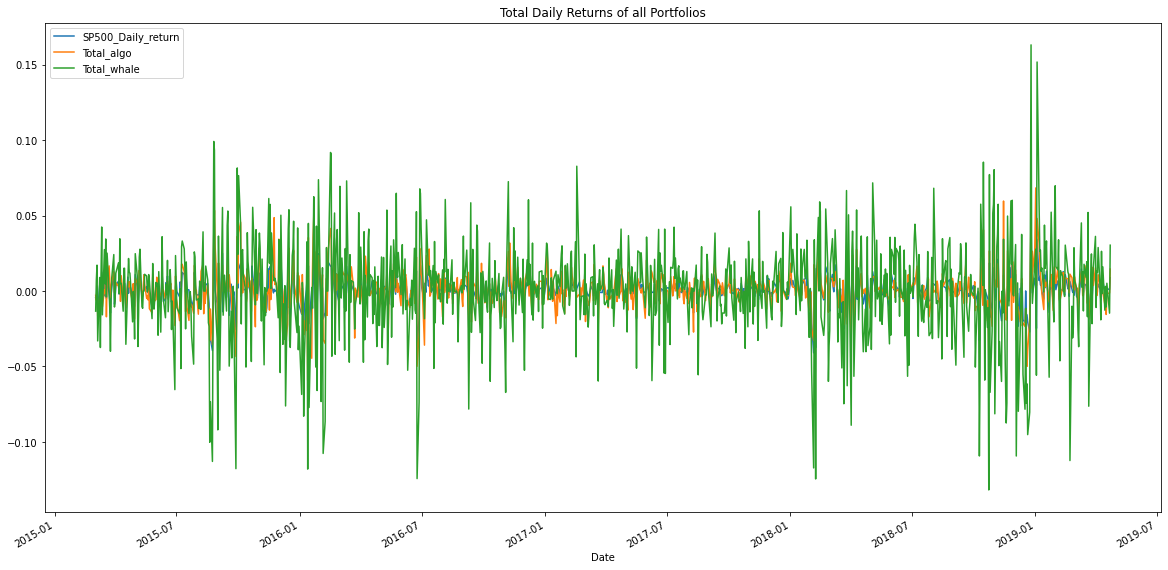

In [16]:
# Plot daily returns of all portfolios
total_portfolios.plot(figsize=(20,10),title='Total Daily Returns of all Portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

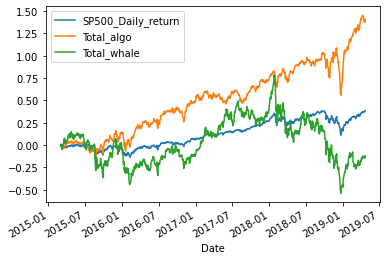

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + total_portfolios).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

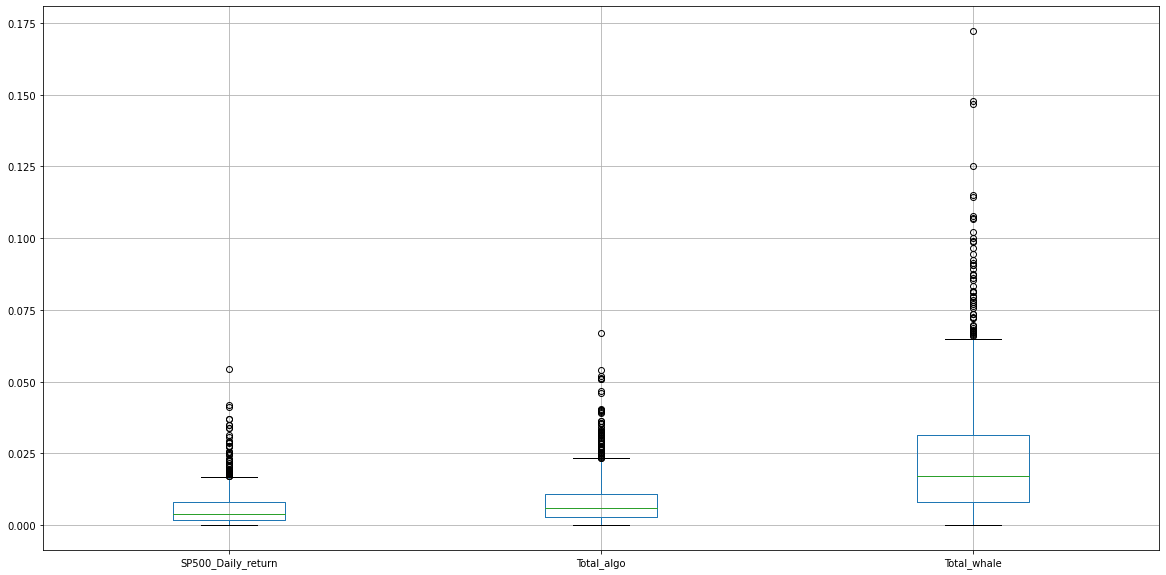

In [18]:
# Box plot to visually show risk
total_portfolios.rolling(window=2).std().boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
algo_std_dev = np.std(total_portfolios['Total_algo'])
whale_std_dev = np.std(total_portfolios['Total_whale'])
sp_std_dev = np.std(total_portfolios['SP500_Daily_return'])
total_portfolios.std()


SP500_Daily_return    0.008554
Total_algo            0.012818
Total_whale           0.031784
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate the daily standard deviation of S&P 500
sp_std_dev = np.std(total_portfolios['SP500_Daily_return'])
# Determine which portfolios are riskier than the S&P 500
def risky_portfolios(portfolioA, sp500):
    if portfolioA > sp500:
        print("would be considered higher risk due to higher standard deviation when compared to S&P500")
    else:
        print("would be considered lower risk due to lower standard deviation when compared to S&P500")

print(f"Whale's Portfolio..")
risky_portfolios(whale_std_dev,sp_std_dev)
print(f"Algo's Portfolio..")
risky_portfolios(algo_std_dev,sp_std_dev)

Whale's Portfolio..
would be considered higher risk due to higher standard deviation when compared to S&P500
Algo's Portfolio..
would be considered higher risk due to higher standard deviation when compared to S&P500


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
volatility = total_portfolios.std() * np.sqrt(252)
volatility

SP500_Daily_return    0.135786
Total_algo            0.203484
Total_whale           0.504559
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

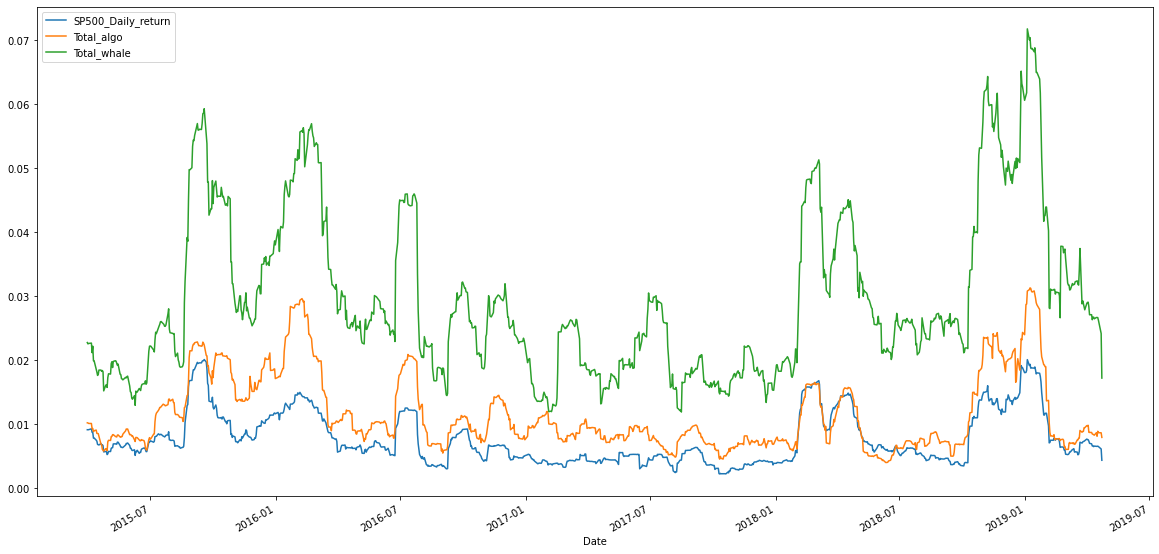

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
total_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
total_portfolios.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

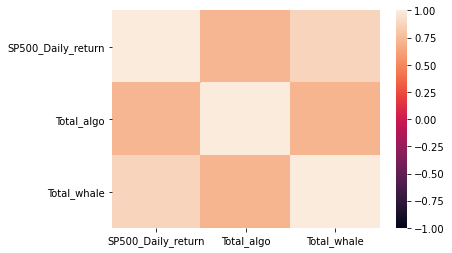

In [23]:
# Calculate the correlation
correlation = total_portfolios.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo Beta Trend'}, xlabel='Date'>

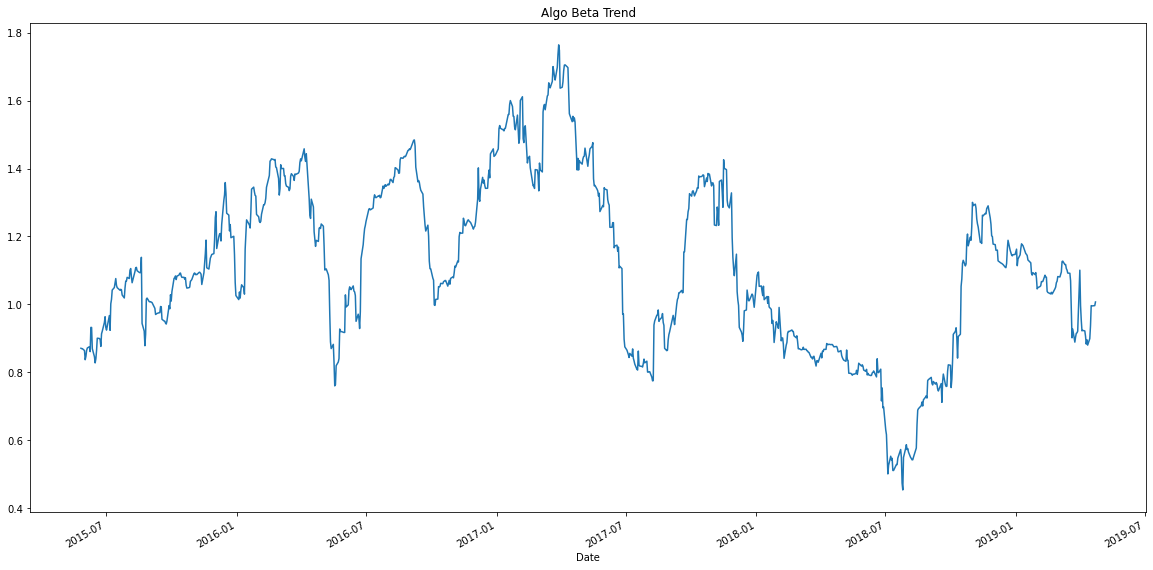

In [24]:
# Calculate covariance of a single portfolio
rolling_algo_covariance = total_portfolios['Total_algo'].rolling(window=60).cov(total_portfolios['SP500_Daily_return'])
# Calculate variance of S&P 500
rolling_sp_variance = total_portfolios['SP500_Daily_return'].rolling(window=60).var()
# Computing beta
rolling_algo_beta = rolling_algo_covariance/rolling_sp_variance
# Plot beta trend
rolling_algo_beta.plot(figsize=(20,10), title="Algo Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

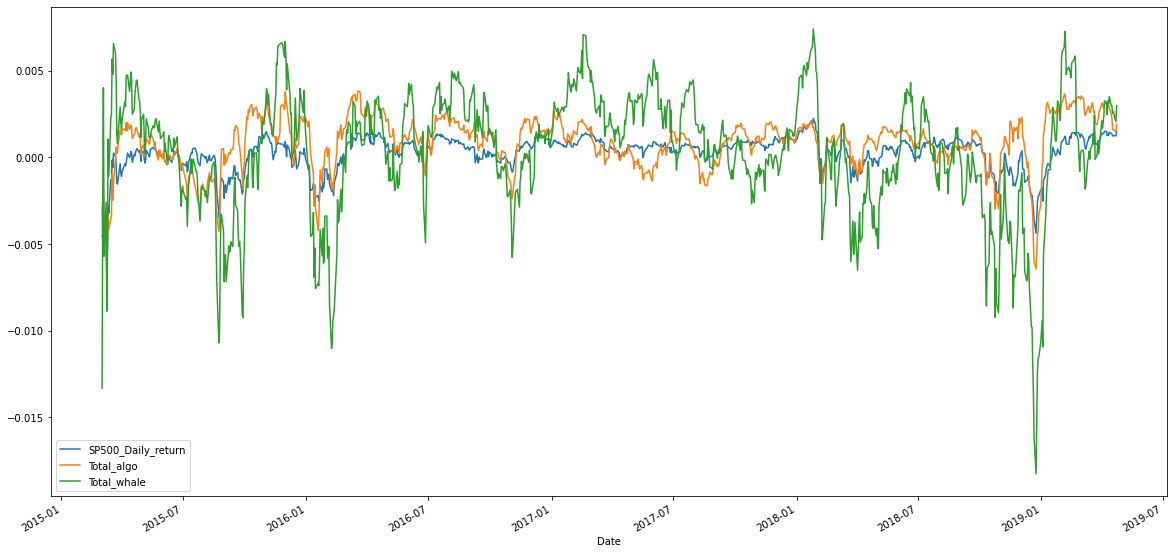

In [25]:
# Use `ewm` to calculate the rolling window
ewm_total_portfolios = total_portfolios.ewm(halflife=21).mean()
ewm_total_portfolios.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (total_portfolios.mean() * 252) / volatility

<AxesSubplot:title={'center':'Sharpe Ratios'}>

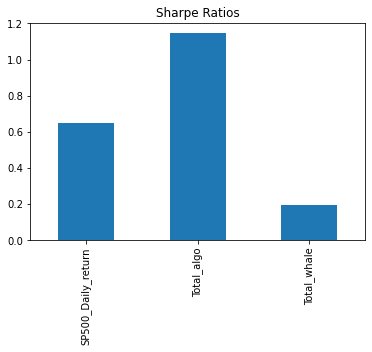

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Answer: Algorithmic strategies has a much higher Sharpe ratio indicating this portfolio yielded more reward when compared to both the market (S&P 500) and the Whales portfolio. The Whale portfolio has a much higher standard deviation (indicating more risk) and lower Sharpe ratio (indicating less reward for the risk assumed) proving that this portfolio stronly underperforms both the market (S&P 500) and Algorithmic strategies.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
# Stocks evaluated are largest publicy traded in *Gold* sector: Newmont Goldcorp, ticker: NEM; Barrick Gold, ticker= GOLD; Franco-Nevada, ticker=FNV.
newmont_file_path = Path("Resources/NEM.csv")
nem_df = pd.read_csv(newmont_file_path, parse_dates=True, infer_datetime_format=True)
nem_df['Date'] = pd.to_datetime(nem_df['Date']).dt.date
nem_df = nem_df.set_index('Date')
nem_df = nem_df.dropna()
nem_df.isnull().sum()

Close    0
dtype: int64

In [29]:
# Reading data from 2nd stock
gold_file_path = Path("Resources/GOLD.csv")
gold_df = pd.read_csv(gold_file_path, parse_dates=True, infer_datetime_format=True)
gold_df['Date'] = pd.to_datetime(gold_df['Date']).dt.date
gold_df = gold_df.set_index('Date')
gold_df = gold_df.dropna()
gold_df.isnull().sum()

Close    0
dtype: int64

In [30]:
# Reading data from 3rd stock
francoNV_file_path = Path("Resources/FNV.csv")
franco_df = pd.read_csv(francoNV_file_path, parse_dates=True, infer_datetime_format=True)
franco_df['Date'] = pd.to_datetime(franco_df['Date']).dt.date
franco_df = franco_df.set_index('Date')
franco_df = franco_df.dropna()
franco_df.isnull().sum()

Close    0
dtype: int64

In [31]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([nem_df,gold_df,franco_df], axis="columns", join="inner")

In [32]:
# Reset Date index
custom_portfolio.sort_index(inplace=True)

In [33]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ['NEM', 'GOLD', 'FNV']
custom_portfolio.head(2)

,NEM,GOLD,FNV
Date,,,
2015-02-20,25.58,12.89,50.48
2015-02-23,25.96,12.71,51.65


In [34]:
# Calculate daily returns
custom_portfolio['NEM_returns'] = custom_portfolio['NEM'].pct_change()
custom_portfolio['GOLD_returns'] = custom_portfolio['GOLD'].pct_change()
custom_portfolio['FNV_returns'] = custom_portfolio['FNV'].pct_change()

# Drop NAs
custom_portfolio = custom_portfolio.dropna()

# Display sample data
custom_portfolio = custom_portfolio.drop(columns=['NEM','GOLD','FNV'])
custom_portfolio.head(10)

,NEM_returns,GOLD_returns,FNV_returns
Date,,,
2015-02-23,0.014855,-0.013964,0.023177
2015-02-24,-0.005778,-0.010228,-0.005227
2015-02-25,0.009299,0.015898,0.012845
2015-02-26,0.009981,-0.001565,0.016910
2015-02-27,0.000760,0.020376,-0.003212
2015-03-02,-0.016711,-0.019969,-0.006825
2015-03-03,-0.010429,-0.019592,-0.012407
2015-03-04,-0.016784,-0.028777,-0.014496
2015-03-05,0.004367,0.003292,0.000784


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio.dot(weights)
cp_cumulative_returns = (1 + custom_portfolio_returns).cumprod() -1
# Display sample data
cp_cumulative_returns

Date
2015-02-23    0.008023
2015-02-24    0.000888
2015-02-25    0.013580
2015-02-26    0.022137
2015-02-27    0.028244
                ...   
2019-04-29    0.243484
2019-04-30    0.256788
2019-05-01    0.236798
2019-05-02    0.229029
2019-05-03    0.235321
Length: 1057, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
final_portfolios = pd.concat([total_portfolios,custom_portfolio,], axis='columns', join='inner')
final_portfolios.sort_index(inplace=True)

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolios.dropna()
final_portfolios.isnull().sum()

SP500_Daily_return    0
Total_algo            0
Total_whale           0
NEM_returns           0
GOLD_returns          0
FNV_returns           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
final_volatility = final_portfolios.std() * np.sqrt(252)
final_volatility

SP500_Daily_return    0.135786
Total_algo            0.203484
Total_whale           0.504559
NEM_returns           0.371071
GOLD_returns          0.435306
FNV_returns           0.315176
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

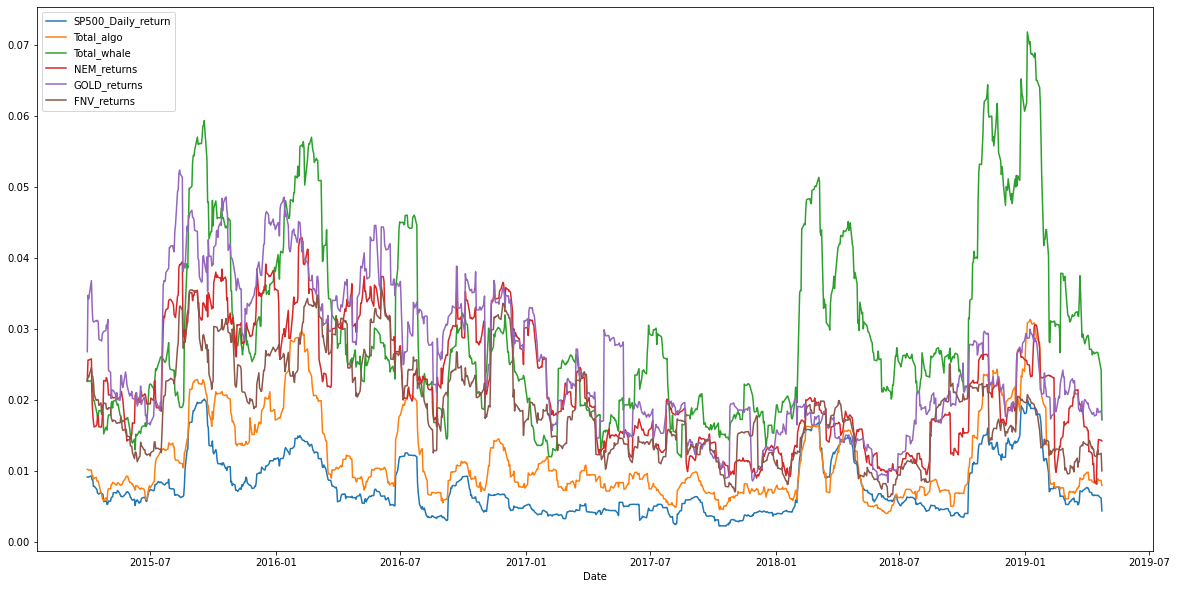

In [39]:
# Calculate rolling standard deviation
final_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
final_portfolios.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

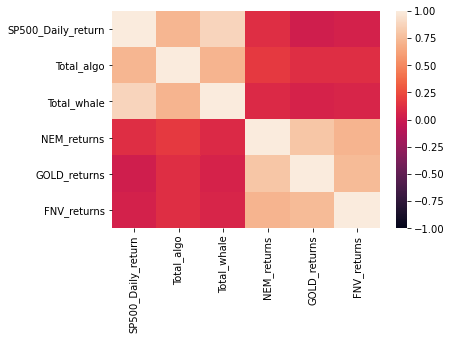

In [40]:
# Calculate and plot the correlation
final_correlation = final_portfolios.corr()
sns.heatmap(final_correlation, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

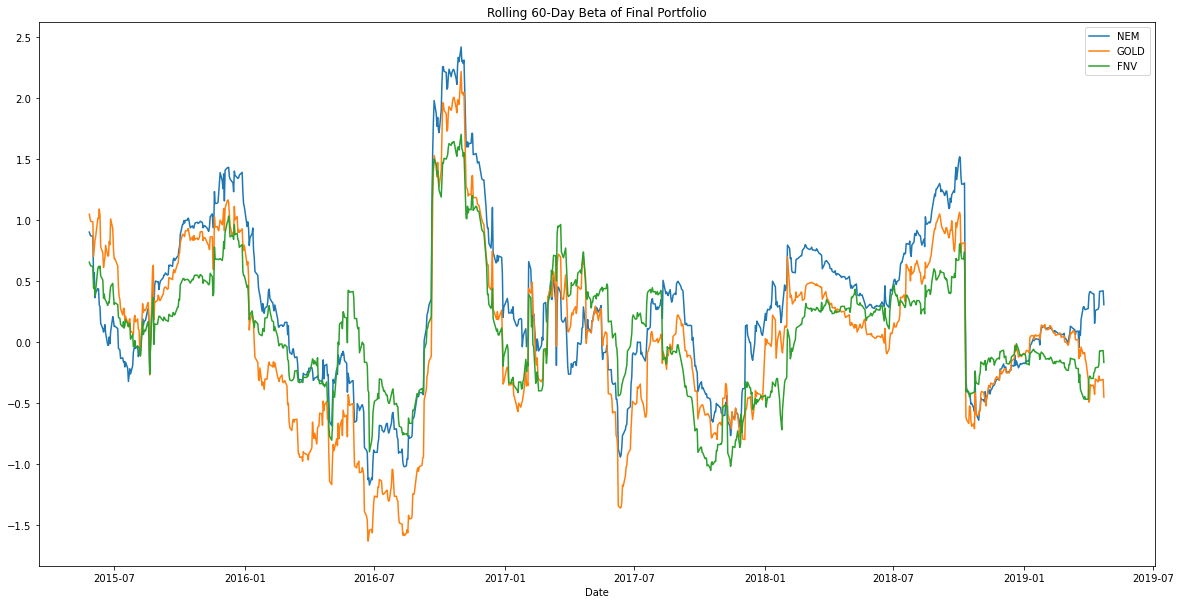

In [41]:
# Calculate and plot Beta
nem_covariance_60roll = final_portfolios['NEM_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
gold_covariance_60roll = final_portfolios['GOLD_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
fnv_covariance_60roll = final_portfolios['FNV_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
nem_beta_60roll = nem_covariance_60roll/rolling_sp_variance
gold_beta_60roll = gold_covariance_60roll/rolling_sp_variance
fnv_beta_60roll = fnv_covariance_60roll/rolling_sp_variance
ax = nem_beta_60roll.plot(figsize=(20,10), title='Rolling 60-Day Beta of Final Portfolio')
gold_beta_60roll.plot(ax=ax)
fnv_beta_60roll.plot(ax=ax)
ax.legend(['NEM','GOLD','FNV'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
final_sharpe_ratios = (final_portfolios.mean() * 252) / final_volatility

<AxesSubplot:title={'center':'Final Sharpe Ratios'}>

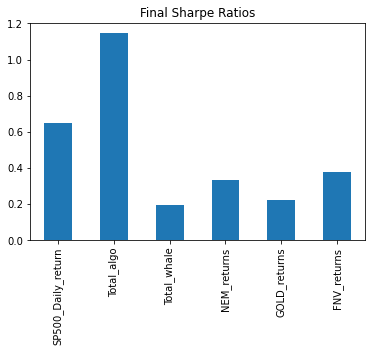

In [43]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot.bar(title='Final Sharpe Ratios')

### How does your portfolio do?

Answer: Algorithmic strategies has a much higher Sharpe ratio compared to the other portfolios indicating it is a smarter investment based on the risk to reward ratio. The customized portfolio ('gold' sector stocks) outperformes the Whale portfolio, but has no comparison to Algorithmic strategies.